  <div style="background-color: lightblue; padding: 40px; font-size: 40px;">
              Investigating Drivers For Telco customer churn 
</div>
  
  

## Imports

In [1]:
# Import pandas for data manipulation
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import custom modules 'acquire' and 'prepare' for data acquisition and preparation
import acquire
from acquire import get_telco_data
import prepare
from prepare import split_function, prep_telco 


# Import train_test_split function for data splitting
from sklearn.model_selection import train_test_split


# Import matplotlib for data visualization
import matplotlib.pyplot as plt


# Import seaborn for enhanced visualization
import seaborn as sns


# Import scipy's stats module for statistical operations
from scipy import stats


# Import the warnings module to manage warning messages
import warnings


## Acquire

 - The data for this project was acquired from the database telco_churn.
 -   The get_db_url function in env module constructs a MySQL database URL, which the get_telco_data function from the acquire module uses to connect to the telco_churn database,fetchs the data, and returns it as a dataframe.

 - The dataset comprises of 7043 rows and 37 columns.

 - Each observation in the dataset represents an individual customer's information and interactions with the telco company.
 
 - Column Descriptions:
    | Column Name           | Description                                          |
|-----------------------|------------------------------------------------------|
| customer_id           | Unique identifier for each customer.                 |
| gender                | Gender of the customer.                             |
| senior_citizen        | Indicates if the customer is a senior citizen (1) or not (0). |
| partner               | Indicates if the customer has a partner (Yes/No).    |
| dependents            | Indicates if the customer has dependents (Yes/No).   |
| tenure                | Number of months the customer has been with the company. |
| phone_service         | Indicates if the customer has phone service (Yes/No). |
| multiple_lines        | Indicates if the customer has multiple phone lines (Yes/No). |
| internet_service_type_id | Identifies the type of internet service the customer has. |
| online_security      | Indicates if the customer has online security service (Yes/No). |
| online_backup        | Indicates if the customer has online backup service (Yes/No). |
| device_protection    | Indicates if the customer has device protection service (Yes/No). |
| tech_support         | Indicates if the customer has tech support service (Yes/No). |
| streaming_tv         | Indicates if the customer has streaming TV service (Yes/No). |
| streaming_movies     | Indicates if the customer has streaming movie service (Yes/No). |
| contract_type_id     | Identifies the type of contract the customer has.    |
| paperless_billing    | Indicates if the customer has paperless billing (Yes/No). |
| payment_type_id      | Identifies the type of payment method the customer uses. |
| monthly_charges      | The amount charged to the customer per month.       |
| total_charges        | The total amount charged to the customer.           |
| churn                | Indicates if the customer has churned (left the company, Yes/No). |
| internet_service_type | Description of the internet service type.           |
| payment_type         | Description of the payment method.                  |
| contract_type        | Description of the contract type.                   |                       |
| streaming_tv             | Indicates if the customer has streaming TV service (Yes/No). |
| streaming_movies         | Indicates if the customer has streaming movie service (Yes/No). |
| contract_type_id         | Identifies the type of contract the customer has.        |
| paperless_billing        | Indicates if the customer has paperless billing (Yes/No). |
| payment_type_id          | Identifies the type of payment method the customer uses.  |
| monthly_charges          | The amount charged to the customer per month.            |
| total_charges            | The total amount charged to the customer.                 |
| churn                    | Indicates if the customer has churned (Yes/No).          |
| internet_service_type    | Description of the internet service type.                |
| payment_type             | Description of the payment method.                       |
| contract_type            | Description of the contract type.                        |
|          |


In [38]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()
telco.sample(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
2717,4537-DKTAL,Female,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,DSL,1,Electronic check,1,Month-to-month
3538,6733-LRIZX,Male,0,No,No,35,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,2,Fiber optic,1,Electronic check,3,Two year
4077,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,2,Fiber optic,3,Bank transfer (automatic),2,One year


## Prepare

 - Steps taken to clean the fetched data: 
     - Missing values will be handled using the .dropna method
     - Removing Duplicate Columns
     - Converting Column Names to Lowercase
     - Categorical columns are encoded using one-hot encoding 
     - Binary categorical variables are encoded by mapping to numeric values
     - Numerical Column Conversion by replacing space with zero
     - Creating Additional Features for analysis
     - cleaned and preprocessed data is returned as a dataframe

#### Import your prepare function and use it to clean your data here


In [39]:
# Use the prep_telco function to clean the data
telco = prep_telco()
telco.sample(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies_Yes,device_protection_No internet service,device_protection_Yes,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,gender_encoded,contract_type_month_to_month
3642,7005-CCBKV,Male,0,No,No,6,Yes,No,2,No,...,1,0,0,0,0,1,1,1,0,1
739,1088-AUUZZ,Male,0,Yes,Yes,56,Yes,Yes,1,Yes,...,1,0,0,1,1,1,1,0,0,0
2658,4351-QLCSU,Female,0,No,No,1,Yes,No,1,No,...,0,0,0,0,0,1,1,1,1,1


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   internet_service_type_id               7043 non-null   int64  
 9   online_security                        7043 non-null   object 
 10  online_backup                          7043 non-null   object 
 11  devi

## Explore

Splitting data before starting to explore

In [40]:
# Split data into three parts train,validate and test set
train, validate, test = split_function(telco, 'churn')

In [ ]:
Exploring the data based on these questions

<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
    
    
 -1. How proficiently can a range of classification models predict customer churn based on tenure, monthly charges, and total charges? 

    
 -2. How does paperless billing impact churn?  
    
 -3. Identify the major contributing factor/factors of customer churn ? 
    
 -4. Do more females churn than males?

    
</div> 

- 1. How proficiently can a range of classification models predict customer churn based on tenure, monthly charges, and total charges?

 - Question: To what extent can different classification models effectively forecast customer churn using factors like tenure, monthly charges, and total charges?
 - Approach: Implement various classification models such as Logistic Regression, Decision Trees, Random Forest etc. Train and evaluate each model's performance using metrics like accuracy, precision, recall, and F1-score. Visualize the model comparisons through ROC curves and confusion matrices.
 - Insights: By comparing the performance of different classification models, you can identify the model that offers the highest accuracy in predicting customer churn based on tenure, monthly charges, and total charges. This analysis aids in selecting the most suitable model for the specific churn prediction task.







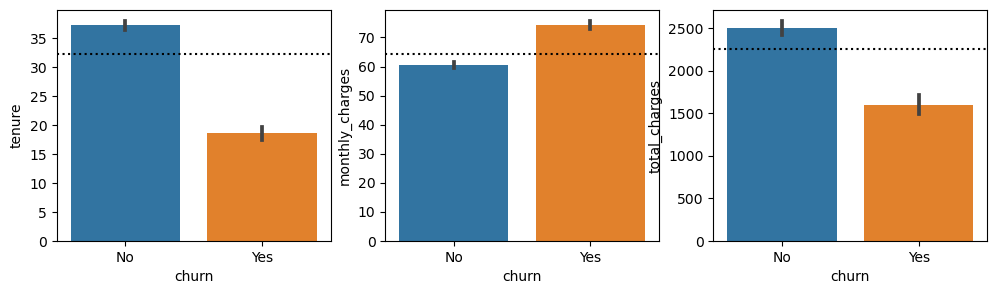

In [11]:
# Analyzing Churn Drivers: Tenure, Monthly Charges, Total Charges
f, axes = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=train, x="churn", y="tenure",ax=axes[0])
l0 = axes[0].axhline(train.tenure.mean(),color='black', linestyle='dotted')
sns.barplot(data=train, x="churn", y="monthly_charges",ax=axes[1])
l1 = axes[1].axhline(train.monthly_charges.mean(), color='black', linestyle='dotted')
sns.barplot(data=train, x="churn", y="total_charges",ax=axes[2])
l2 = axes[2].axhline(train.total_charges.mean(), color='black', linestyle='dotted')
plt.show()

- Here the dotted line represents the overall mean tenure across all customers. Average tenure of churned customers is significantly lower than the mean, it suggests that customers with shorter tenure are more likely to churn.

- Since average monthly charges of churned customers are higher than the mean, it implies that customers with higher monthly charges might be more prone to churning.
 
- Since the average total charges of churned customers differ significantly from the mean, it could indicate  that the customers with shorter tenure are more likely to churn.

- Let's do a Hypothesis test of total_charges and monthly_charges to test the correlation
 - Type of test:- Pearson correlation test 

 - Null Hypothesis (H0): There is no significant linear correlation between 'total_charges' and 'monthly_charges'.

 - Alternative Hypothesis (H1): There is a significant linear correlation between 'total_charges' and 'monthly_charges'.    

In [12]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(train['total_charges'], train['monthly_charges'])

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear correlation.")

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)


Reject the null hypothesis. There is a significant linear correlation.
Pearson correlation coefficient: 0.6542704940513556
p-value: 0.0


 Summary:
    * The p-value is smaller than the significance level (alpha) of 0.05. This indicates strong evidence against the null hypothesis.
    
    * The Pearson correlation coefficient value of approximately 0.651 indicates a moderate positive linear correlation between the two variables. As 'total_charges' increase, 'monthly_charges' also tends to increase.
In short, the code confirms a significant positive linear correlation between 'total_charges' and 'monthly_charges' in the dataset.

 
 - Let's do a Hypothesis test of total_charges and tenure to test the correlation
 - Type of test:-        Statistical Tests for total charges and tenure
 -  Hypothesis:-

 - Null Hypothesis (H0): There is no significant linear correlation between 'total_charges' and 'tenure'.
 - Alternative Hypothesis (H1): There is a significant linear correlation between 'total_charges' and 'tenure'.


In [13]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(train['total_charges'], train['tenure'])

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear correlation.")

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)


Reject the null hypothesis. There is a significant linear correlation.
Pearson correlation coefficient: 0.8232502341130677
p-value: 0.0



 - Exploration Summary:-
    
 - In conclusion, both correlations can provide valuable insights into churn prediction:

 - The correlation between 'total_charges' and 'monthly_charges' indirectly informs about customer behavior associated with higher charges.
 - The correlation between 'total_charges' and 'tenure' directly indicates that longer-tenured, higher-spending customers are less likely to churn, which could be a crucial factor in churn prediction models.


 - Modeling

In [16]:
#list includes columns that are being excluded from the dataset
#keeping total charges
# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
        'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'contract_type_One year', 'contract_type_Two year',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded', 'gender_encoded',
       'contract_type_month_to_month']


#prepares the training, validation, and testing datasets 
#by selecting specific columns and target variable for each set

X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



<div style="background-color: lightblue; padding: 40px; font-size: 18px;">
            Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library
</div>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    #(Receiver Operating Characteristic - Area Under the Curve)
    #ROC-AUC is a commonly used evaluation metric for binary classification problems
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")


Model: Logistic Regression
Accuracy: 0.7346
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5000
confusion_matrix:
---------------
[[1035    0]
 [ 374    0]]
Model: Random Forest
Accuracy: 0.6473
Precision: 0.3386
Recall: 0.3449
F1-Score: 0.3417
ROC-AUC: 0.5507
confusion_matrix:
---------------
[[783 252]
 [245 129]]
Model: K-Nearest Neighbors
Accuracy: 0.7175
Precision: 0.4394
Recall: 0.2326
F1-Score: 0.3042
ROC-AUC: 0.5627
confusion_matrix:
---------------
[[924 111]
 [287  87]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
 - Summary:-
    
    
 - Of the three models, Logistic Regression is the best model with an accuracy of  0.7871    
    
    
    
  - This comprehensive assessment aids in the informed selection of the Logistic Regression model as the optimal choice for predicting customer churn, facilitating the development of targeted strategies to mitigate churn and enhance customer retention.
 
</div> 


 - 2. How does paperless billing impact churn?

 - Question: Does having paperless billing affect the likelihood of churn?
 - Approach: Create a contingency table and perform a chi-squared test to determine if paperless billing and churn are dependent on each other. Visualize the proportions of churned and non-churned customers with and without paperless billing.
 - Insights: If paperless billing is found to be significantly associated with churn, it indicates that billing preferences play a role in customer decisions to churn.

Type of test:- Chi-squared test    
It assess the association between two categorical variables, 
'paperless_billing_encoded' and 'churn_encoded', in the dataset.

Hypothesis:

Null Hypothesis (H0): There is no significant association between 'paperless_billing_encoded' and 'churn_encoded'.
Alternative Hypothesis (H1): There is a significant association between 'paperless_billing_encoded' and 'churn_encoded'.

In [6]:
# Create a 2x2 contingency table
contingency_table = pd.crosstab(train['paperless_billing_encoded'], train['churn_encoded'])

# Perform chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association.")
else:
    print("Fail to reject the null hypothesis. There is no significant association.")

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)


Reject the null hypothesis. There is a significant association.
Chi-squared statistic: 137.97271416913495
p-value: 7.388506500754525e-32



Summary:-
-  The large chi-squared statistic and very small p-value indicate a significant association between the variables.    
 



In [9]:
#keep 'paperless_billing_encoded',
#list includes columns that are being excluded from the dataset
# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'contract_type_One year', 'contract_type_Two year',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
        'churn_encoded', 'gender_encoded',
       'contract_type_month_to_month']

#prepares the training, validation, and testing datasets 
#by selecting specific columns and target variable for each set

X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



<div style="background-color: lightblue; padding: 40px; font-size: 18px;">
            Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library
</div>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    #(Receiver Operating Characteristic - Area Under the Curve)
    #ROC-AUC is a commonly used evaluation metric for binary classification problems
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")


Model: Logistic Regression
Accuracy: 0.7346
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5000
confusion_matrix:
---------------
[[1035    0]
 [ 374    0]]
Model: Random Forest
Accuracy: 0.7346
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5000
confusion_matrix:
---------------
[[1035    0]
 [ 374    0]]
Model: K-Nearest Neighbors
Accuracy: 0.5444
Precision: 0.3416
Recall: 0.7727
F1-Score: 0.4738
ROC-AUC: 0.6173
confusion_matrix:
---------------
[[478 557]
 [ 85 289]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
 -  The poor performance of the models suggests that paperless billing alone may not be a strong indicator of customer churn. This could mean that other factors beyond paperless billing play a more influential role in determining whether a customer churns or not.   
 
</div> 


 3. Question: What are the main factors that contribute to customer churn?
 - Approach: Perform exploratory data analysis to identify the most frequent characteristics associated with churned customers. Use visualizations like bar plots or heatmaps to show the distribution of features such as contract type, internet service, and online security among churned customers.
 - Insights: By analyzing the features that are most prevalent among churned customers, you can identify potential areas for improvement that might help reduce churn.

Type of test:- A two-sample t-test to compare the mean monthly charges between churned and non-churned customers 
in a telecommunications dataset. 

 - Null Hypothesis (H0): There is no significant difference in mean monthly charges between churned and non-churned customers.
 - Alternative Hypothesis (H1): There is a significant difference in mean monthly charges between churned and non-churned customers.

In [15]:
# Create samples for churned and non-churned customers
churned = train[train['churn_encoded'] == 1]['monthly_charges']
non_churned = train[train['churn_encoded'] == 0]['monthly_charges']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(churned, non_churned, equal_var=True)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean monthly charges.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean monthly charges.")



t-statistic: 13.267338007913029
p-value: 2.177453642763241e-39
Reject the null hypothesis. There is a significant difference in mean monthly charges.


In [18]:
#list includes columns that are being excluded from the dataset
#Keeping 'paperless_billing_encoded','tenure','total_charges','monthly_charges',

# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
        'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 
       'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'contract_type_One year', 'contract_type_Two year',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
        'churn_encoded', 'gender_encoded',
       'contract_type_month_to_month']


#prepares the training, validation, and testing datasets 
#by selecting specific columns and target variable for each set


X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



<div style="background-color: lightblue; padding: 40px; font-size: 18px;">
            Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library
</div>

Model: Logistic Regression
Accuracy: 0.7857
Precision: 0.6429
Recall: 0.4332
F1-Score: 0.5176
ROC-AUC: 0.6731
confusion_matrix:
---------------
[[945  90]
 [212 162]]
Model: Random Forest
Accuracy: 0.7715
Precision: 0.5861
Recall: 0.4733
F1-Score: 0.5237
ROC-AUC: 0.6762
confusion_matrix:
---------------
[[910 125]
 [197 177]]
Model: K-Nearest Neighbors
Accuracy: 0.7644
Precision: 0.5724
Recall: 0.4439
F1-Score: 0.5000
ROC-AUC: 0.6620
confusion_matrix:
---------------
[[911 124]
 [208 166]]

Feature Importance Analysis:
                     Feature  Importance
1            monthly_charges    0.384805
2              total_charges    0.354460
0                     tenure    0.226866
3  paperless_billing_encoded    0.033870


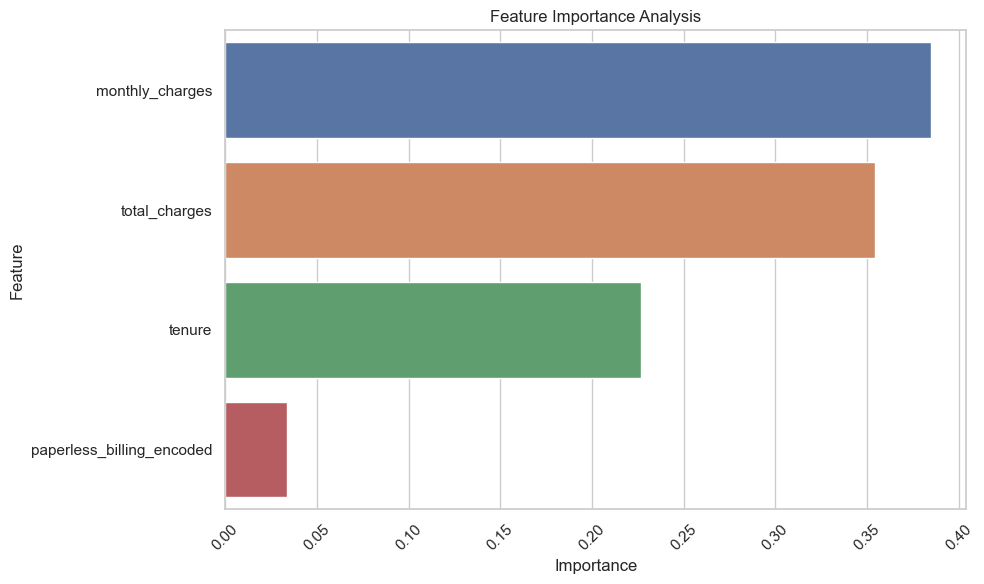

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Evaluate models
evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")

# Feature Importance Analysis using Random Forest
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances along with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("\nFeature Importance Analysis:")
print(feature_importance_df)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title("Feature Importance Analysis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
 Summary:-
 
    
 - Feature Importance Analysis clearly shows that features like "monthly_charges," "total_charges," and "tenure" 
    strongly influence predictions, emphasizing their importance in understanding and anticipating customer behavior.  
 
    - The major factor that influence customer churn is monthly charges.  
</div> 


- 4. Question: What insights can be drawn from the "Churn by Contract Type" visualization regarding the likelihood of customers to churn based on their contract type?

 - Approach: Examine the "Churn by Contract Type" count plot to evaluate the distribution of customer churn across different contract types. Utilize visualizations to assess how the churn rates differ among the various contract options.

 - Insights: By analyzing the "Churn by Contract Type" plot, you can discern the contract type(s) associated with higher and lower churn rates. This analysis provides valuable information on how different contract durations influence customer decisions to churn. Identifying these patterns empowers strategic decision-making by understanding which contract types might need optimization or retention strategies to mitigate churn effectively.






-4 Question: Do more females churn than males?

 - Approach: Examine the churn distribution based on gender. Utilize a count plot to visualize how churn rates differ between male and female customers.

 - Insights: Analyzing the count plot depicting the churn rates among genders can reveal whether there's a notable discrepancy in churn between females and males. This insight helps in understanding potential gender-related patterns in customer churn. If the churn rate for females is significantly higher than for males, it could warrant further investigation into factors contributing to this disparity, which might involve gender-specific retention strategies.

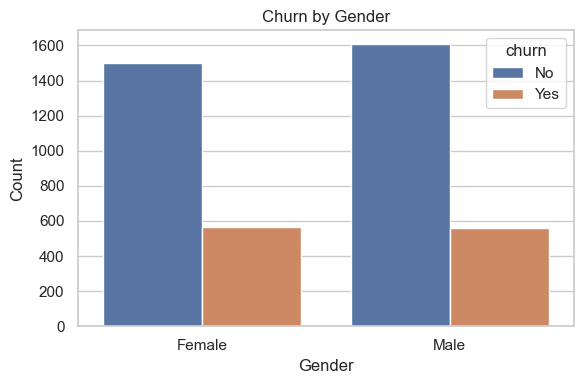

In [36]:
#count plot visualization 
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
sns.countplot(data=train, x="gender", hue="churn")
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [43]:
#list includes columns that are being excluded from the dataset
#Keeping , 'gender_encoded',
# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'contract_type_One year', 'contract_type_Two year',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'contract_type_month_to_month']

#prepares the training, validation, and testing datasets 
#by selecting specific columns and target variable for each set

X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']



<div style="background-color: lightblue; padding: 40px; font-size: 18px;">
            Implementing Logistic Regression, Random Forest, and K-Nearest Neighbors (KNN) classification algorithms using Python's scikit-learn library
</div>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    #(Receiver Operating Characteristic - Area Under the Curve)
    #ROC-AUC is a commonly used evaluation metric for binary classification problems
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")


<div style="background-color: lightgreen; padding: 40px; font-size: 18px;">
 - Summary:-
    
 - Considering the results, it appears that none of the models are performing well in predicting the churn based on the gender feature. This might suggest that the feature 'gender' alone may not be a strong indicator of churn. 
    
 - It's important to explore additional features and consider more sophisticated models or techniques to improve prediction performance.     
 
</div> 


## Modeling Wrap

  - The models' test scores indicate that their predictive performance falls short of what's needed for deployment in production, especially when considering a reduced set of columns.

## Conclusion

 - In conclusion, this project has provided valuable insights into customer churn behavior and its relationship with various factors. Through exploratory data analysis and model evaluation, we have gained a deeper understanding of the dynamics influencing churn.

## Recommendations

 - If models are deployed, establish a monitoring system to track their performance in real-time. This ensures the models remain effective as customer behavior evolves. Explore whether there are pain points or dissatisfaction points that lead customers to churn more frequently. Consider offering incentives or tailored retention strategies to encourage longer-term contracts, potentially reducing churn.

## Next Steps

 - Invest time in exploring and engineering more relevant features that could provide deeper insights into customer churn behavior. This might involve deriving new variables from existing ones or integrating external data sources that could offer valuable predictive power.